## Learn Data Cleaning- *Exercises*

Source: kaggle.com
Author: Rachael Tatman

Start Date: 10 Apr 2025

Completed:  13 Apr 2025

In [80]:
## Packages to load & use
import pandas as pd
import numpy as np
import datetime, charset_normalizer
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt

import fuzzywuzzy
from fuzzywuzzy import process

## Path to data folder
import os
datapath = os.getcwd() + '/data'

## Random seeding
np.random.seed(0)


/home/rty10/miniconda3/envs/datasci/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


---

### I. Handling Missing Values

In [4]:
sf_permits = pd.read_csv(datapath+'/Building_Permits.csv')
np.random.seed(0)


/tmp/ipykernel_13826/3922251139.py:1: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  sf_permits = pd.read_csv(datapath+'/Building_Permits.csv')


In [5]:
sf_permits.head(5)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [8]:
100 * ( sf_permits.isnull().sum().sum() / np.product( sf_permits.shape ) )

26.26002315058403

In [9]:
sf_permits[["Street Number Suffix", "Zipcode"]]

,Street Number Suffix,Zipcode
0,NaN,94102.0
1,NaN,94102.0
2,NaN,94109.0
3,NaN,94109.0
4,NaN,94102.0
...,...,...
198895,NaN,NaN
198896,NaN,NaN
198897,NaN,NaN
198898,NaN,NaN


In [10]:
sf_permits.dropna()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


In [11]:
sf_permits_with_na_dropped = sf_permits.dropna(axis=1)

sf_permits.shape[1]-sf_permits_with_na_dropped.shape[1]

31

In [12]:
sf_permits.fillna(method='bfill', axis=0).fillna(0)


/tmp/ipykernel_13826/377761002.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sf_permits.fillna(method='bfill', axis=0).fillna(0)


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,A,Ellis,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,A,Geary,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,A,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,Y,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,A,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),Y,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,A,Market,St,...,3.0,constr type 3,1.0,constr type 1,Y,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,0,Montgomery,St,...,5.0,wood frame (5),5.0,wood frame (5),0,0.0,0,0.0,0,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,0,Bush,St,...,5.0,wood frame (5),5.0,wood frame (5),0,0.0,0,0.0,0,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,0,Indiana,St,...,0.0,0,0.0,0,0,0.0,0,0.0,0,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,0,Sutter,St,...,0.0,0,0.0,0,0,0.0,0,0.0,0,1489608233656


In [13]:
del sf_permits_with_na_dropped, sf_permits


---

### 2. Scaling & Normalization

In [2]:
kickstarters_2017 = pd.read_csv(datapath + '/ks-projects-201801.csv')

kickstarters_2017.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
## Scale the goals of each campaign

orig_data   = pd.DataFrame(kickstarters_2017.usd_goal_real)
scaled_data = minmax_scaling(orig_data, columns=['usd_goal_real'])

print('Original data\nPreview:\n', orig_data.head())
print('Minimum value:', float(orig_data.min()),
      '\nMaximum value:', float(orig_data.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_data.head())
print('Minimum value:', float(scaled_data.min()),
      '\nMaximum value:', float(scaled_data.max()))
print('_'*30)

del orig_data, scaled_data


Original data
Preview:
    usd_goal_real
0        1533.95
1       30000.00
2       45000.00
3        5000.00
4       19500.00
Minimum value: 0.01 
Maximum value: 166361390.71
______________________________

Scaled data
Preview:
    usd_goal_real
0       0.000009
1       0.000180
2       0.000270
3       0.000030
4       0.000117
Minimum value: 0.0 
Maximum value: 1.0
______________________________


/tmp/ipykernel_17255/4178794295.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Minimum value:', float(orig_data.min()),
/tmp/ipykernel_17255/4178794295.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  '\nMaximum value:', float(orig_data.max()))
/tmp/ipykernel_17255/4178794295.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Minimum value:', float(scaled_data.min()),
/tmp/ipykernel_17255/4178794295.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  '\nMaximum value:', float(scaled_data.max()))


In [4]:
orig_goal_data   = pd.DataFrame(kickstarters_2017.goal)
scaled_goal_data = minmax_scaling(orig_goal_data, columns=['goal'])

print('Original data\nPreview:\n', orig_goal_data.head())
print('Minimum value:', float(orig_goal_data.min()),
      '\nMaximum value:', float(orig_goal_data.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_goal_data.head())
print('Minimum value:', float(scaled_goal_data.min()),
      '\nMaximum value:', float(scaled_goal_data.max()))
print('_'*30)

del orig_goal_data, scaled_goal_data


Original data
Preview:
       goal
0   1000.0
1  30000.0
2  45000.0
3   5000.0
4  19500.0
Minimum value: 0.01 
Maximum value: 100000000.0
______________________________

Scaled data
Preview:
        goal
0  0.000010
1  0.000300
2  0.000450
3  0.000050
4  0.000195
Minimum value: 0.0 
Maximum value: 1.0
______________________________


/tmp/ipykernel_17255/3610440613.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Minimum value:', float(orig_goal_data.min()),
/tmp/ipykernel_17255/3610440613.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  '\nMaximum value:', float(orig_goal_data.max()))
/tmp/ipykernel_17255/3610440613.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Minimum value:', float(scaled_goal_data.min()),
/tmp/ipykernel_17255/3610440613.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  '\nMaximum value:', float(scaled_goal_data.max()))


In [5]:
## Normalize amount of money pledged

idx_pos_pledges = kickstarters_2017.usd_pledged_real > 0
pos_pledges     = kickstarters_2017.usd_pledged_real.loc[idx_pos_pledges]

norm_pledges    = pd.Series(stats.boxcox(pos_pledges)[0],
                            name='usd_pledged_real',
                            index = pos_pledges.index)

print('Original data\nPreview:\n', pos_pledges.head())
print('Minimum value:', float(pos_pledges.min()),
      '\nMaximum value:', float(pos_pledges.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', norm_pledges.head())
print('Minimum value:', float(norm_pledges.min()),
      '\nMaximum value:', float(norm_pledges.max()))


Original data
Preview:
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: usd_pledged_real, dtype: float64
Minimum value: 0.45 
Maximum value: 20338986.27
______________________________

Normalized data
Preview:
 1    10.165142
2     6.468598
3     0.000000
4     9.129277
5    15.836852
Name: usd_pledged_real, dtype: float64
Minimum value: -0.7779954154530838 
Maximum value: 30.690537060647134


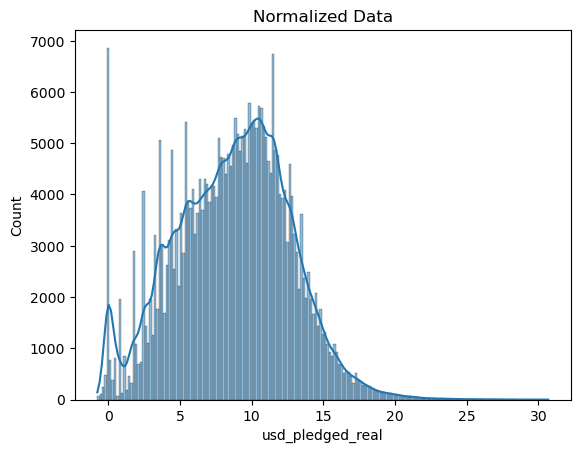

<Figure size 640x480 with 0 Axes>

In [ ]:
ax = sns.histplot(norm_pledges, kde=True)
ax.set_title("Normalized Data")
plt.show()
plt.clf()


In [7]:
del idx_pos_pledges, pos_pledges, norm_pledges

In [8]:
idx_pos_pledges = kickstarters_2017.pledged > 0
pos_pledges     = kickstarters_2017.pledged.loc[idx_pos_pledges]

norm_pledges    = pd.Series(stats.boxcox(pos_pledges)[0],
                            name='pledged',
                            index = pos_pledges.index)

print('Original data\nPreview:\n', pos_pledges.head())
print('Minimum value:', float(pos_pledges.min()),
      '\nMaximum value:', float(pos_pledges.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', norm_pledges.head())
print('Minimum value:', float(norm_pledges.min()),
      '\nMaximum value:', float(norm_pledges.max()))
print('_'*30)


Original data
Preview:
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: pledged, dtype: float64
Minimum value: 1.0 
Maximum value: 20338986.27
______________________________

Normalized data
Preview:
 1    10.013887
2     6.403368
3     0.000000
4     9.005193
5    15.499596
Name: pledged, dtype: float64
Minimum value: 0.0 
Maximum value: 29.630308617318825
______________________________


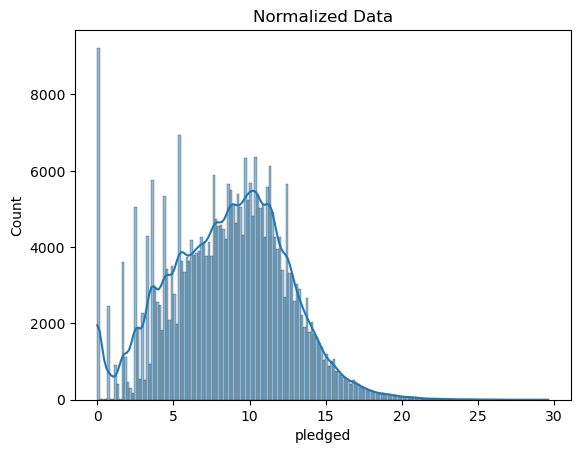

<Figure size 640x480 with 0 Axes>

In [9]:
ax = sns.histplot(norm_pledges, kde=True)
ax.set_title("Normalized Data")
plt.show()
plt.clf()


In [10]:
del idx_pos_pledges, pos_pledges, norm_pledges

---

### 3. Parsing Data

In [52]:
earthquakes = pd.read_csv(datapath+'/earthquake_database.csv')
earthquakes.head(5)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [16]:
earthquakes.Date.dtypes

dtype('O')

In [17]:
earthquakes[3378:3383]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
3379,02/23/1975,03:53:36,-21.727,-71.356,Earthquake,33.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A0A,US,US,US,Reviewed
3380,02/23/1975,07:34:11,-10.879,166.667,Earthquake,33.0,NaN,NaN,5.5,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A0C,US,US,US,Reviewed
3381,02/25/1975,05:20:05,-7.388,149.798,Earthquake,33.0,NaN,NaN,5.5,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A12,US,US,US,Reviewed
3382,02/26/1975,04:48:55,85.047,97.969,Earthquake,33.0,NaN,NaN,5.6,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A1H,US,US,US,Reviewed


In [44]:
earthquakes.Date.str.len().value_counts()

Date
10    23409
24        3
Name: count, dtype: int64

In [53]:
idx = np.where([earthquakes.Date.str.len()==24])[1]
print(idx)
earthquakes.loc[idx]

[ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


In [55]:
for i in idx:
    datestr = earthquakes.loc[i]['Date'].split('T')[0]
    earthquakes.loc[i, 'Date'] = datestr.split('-')[1]+'/'+datestr.split('-')[2]+'/'+datestr.split('-')[0]
    del datestr

earthquakes['date_parsed'] = pd.to_datetime(earthquakes.Date, format="%m/%d/%Y")


In [58]:
day_of_month_earthquakes = earthquakes.date_parsed.dt.day.dropna()
day_of_month_earthquakes.head(5)

0    2
1    4
2    5
3    8
4    9
Name: date_parsed, dtype: int32

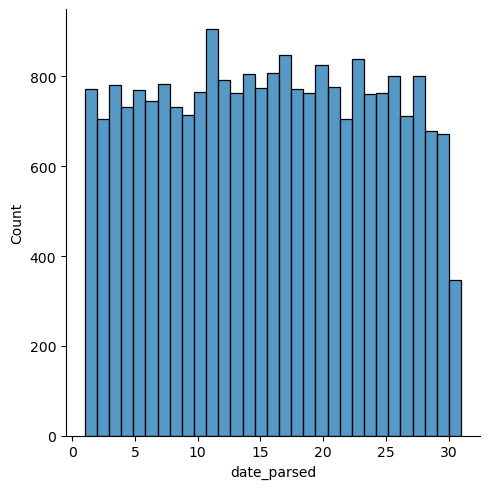

In [59]:
sns.displot(day_of_month_earthquakes, kde=False, bins=31)

In [60]:
del earthquakes, day_of_month_earthquakes

---

### 4. Character Encodings

In [62]:
sample_entry = b'\xa7A\xa6n'
print(sample_entry)
print('data type:', type(sample_entry))

b'\xa7A\xa6n'
data type: <class 'bytes'>


In [70]:
new_entry = sample_entry.decode("big5-tw", errors="replace").encode("utf-8")

type(new_entry)

bytes

In [71]:
new_entry

b'\xe4\xbd\xa0\xe5\xa5\xbd'

In [73]:
police_killings = pd.read_csv(datapath +'/PoliceKillingsUS.csv')
police_killings.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 25272: invalid start byte

In [76]:
with open(datapath +'/PoliceKillingsUS.csv', 'rb') as infile:
    result = charset_normalizer.detect(infile.read(50000))
    print(result)


{'encoding': 'windows-1250', 'language': 'English', 'confidence': 1.0}


In [77]:
police_killings = pd.read_csv(datapath +'/PoliceKillingsUS.csv',
                              encoding = "Windows-1252")
police_killings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [78]:
police_killings.to_csv(datapath+'/PoliceKillingsUS_utf8.csv')
del police_killings


---

### 5. Inconsistent Data Entry

In [81]:
def replace_matches_in_column(df, column, str_to_match, min_ratio=47):
    '''
    Function that replace rows in provided column(s) of dataframe 'df'
    that match the provided string 'str_to_match' avoce the provided ratio
    'min_ratio' with provided string
    Dependencies: pandas, fuzzywuzzy
    ''' 
    strings = df[column].unique()
    matches = fuzzywuzzy.process.extract(str_to_match, 
                                         strings, 
                                         limit=10, 
                                         scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    close_matches = [match[0] for match in matches 
                    if match[1] >= min_ratio]

    rows_with_matches                 = df[column].isin(close_matches)
    df.loc[rows_with_matches, column] = str_to_match
    print("Match replacement complete")
    return



In [82]:
professors = pd.read_csv(datapath +'/pakistan_intellectual_capital_updated.csv')
professors.head()

,Unnamed: 0.1,Unnamed: 0,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,0,2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,thailand,NaN,Software Engineering & DBMS,NaN
1,1,4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,thailand,NaN,DBMS,NaN
2,2,5,6,Dr. Junaid Baber,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,thailand,NaN,"Information processing, Multimedia mining",NaN
3,3,6,7,Dr. Maheen Bakhtyar,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,thailand,NaN,"NLP, Information Retrieval, Question Answering...",NaN
4,4,24,25,Samina Azim,Sardar Bahadur Khan Women's University,Computer Science,Balochistan,Lecturer,BS,Balochistan University of Information Technolo...,pakistan,2005.0,VLSI Electronics DLD Database,NaN


In [84]:
grad = professors['Graduated from'].unique()
grad.sort()
grad


array([' Columbia University', ' Delft University of Technology',
       ' Iowa State University', ' University of Central Florida',
       ' University of Innsbruck',
       ' University of Texas at Arlington (UTA)', ' University of Turin',
       'Abasyn University', 'Abdul Wali Khan University, Mardan',
       'Abdus Salam School of Mathematical Sciences,GC University',
       'Agricultural University Peshawar', 'Allama Iqbal Open University',
       'Asian Institute of Technology', 'Aston University, Birmingham',
       'Australian National University, Caneberra', 'BUKC',
       'Bahauddin Zakariya University', 'Bahria University',
       'Bahria University,Islamabad',
       'Balochistan University of Information Technology, Engineering and Management Sciences',
       'Barani Institute of Information Technology',
       'Beaconhouse National University', 'Beihang University',
       'Beijing Institute of Technology',
       'Beijing Institute of Technology Beijing',
       'Beiji

In [85]:
professors['Graduated from'] = professors['Graduated from'].str.strip()


In [97]:
countries = professors.Country.unique()
countries.sort()

fuzzywuzzy.process.extract("usa", countries, limit=10,
                           scorer=fuzzywuzzy.fuzz.token_sort_ratio)



[('usa', 100),
 ('usofa', 75),
 ('austria', 60),
 ('australia', 50),
 ('spain', 50),
 ('urbana', 44),
 ('uk', 40),
 ('malaysia', 36),
 ('pakistan', 36),
 ('portugal', 36)]

In [98]:
replace_matches_in_column(df=professors, column='Country', str_to_match='usa', min_ratio=70)


Match replacement complete


In [99]:
del professors, countries, grad


---